In [1]:
# AMDG
import os
import json

channel_ids = []
kindness_scores = []
volatility_scores = []
total_comments = 0

with os.scandir('channel-ratings') as files:
    for idx, file in enumerate(files):
        with open(file, 'r') as open_file:
            data = json.load(open_file)
            channel_ids.append(data['channel-id'])
            kindness_scores.append(data['kindness'])
            volatility_scores.append(data['volatility'])
            total_comments += data['num-comments-analyzed']

In [3]:
sorted_data = sorted(zip(volatility_scores, channel_ids), key=lambda x: x[0])
sorted_volatility = [score for score, _ in sorted_data]
channels_by_volatility = [channel_id for _, channel_id in sorted_data]

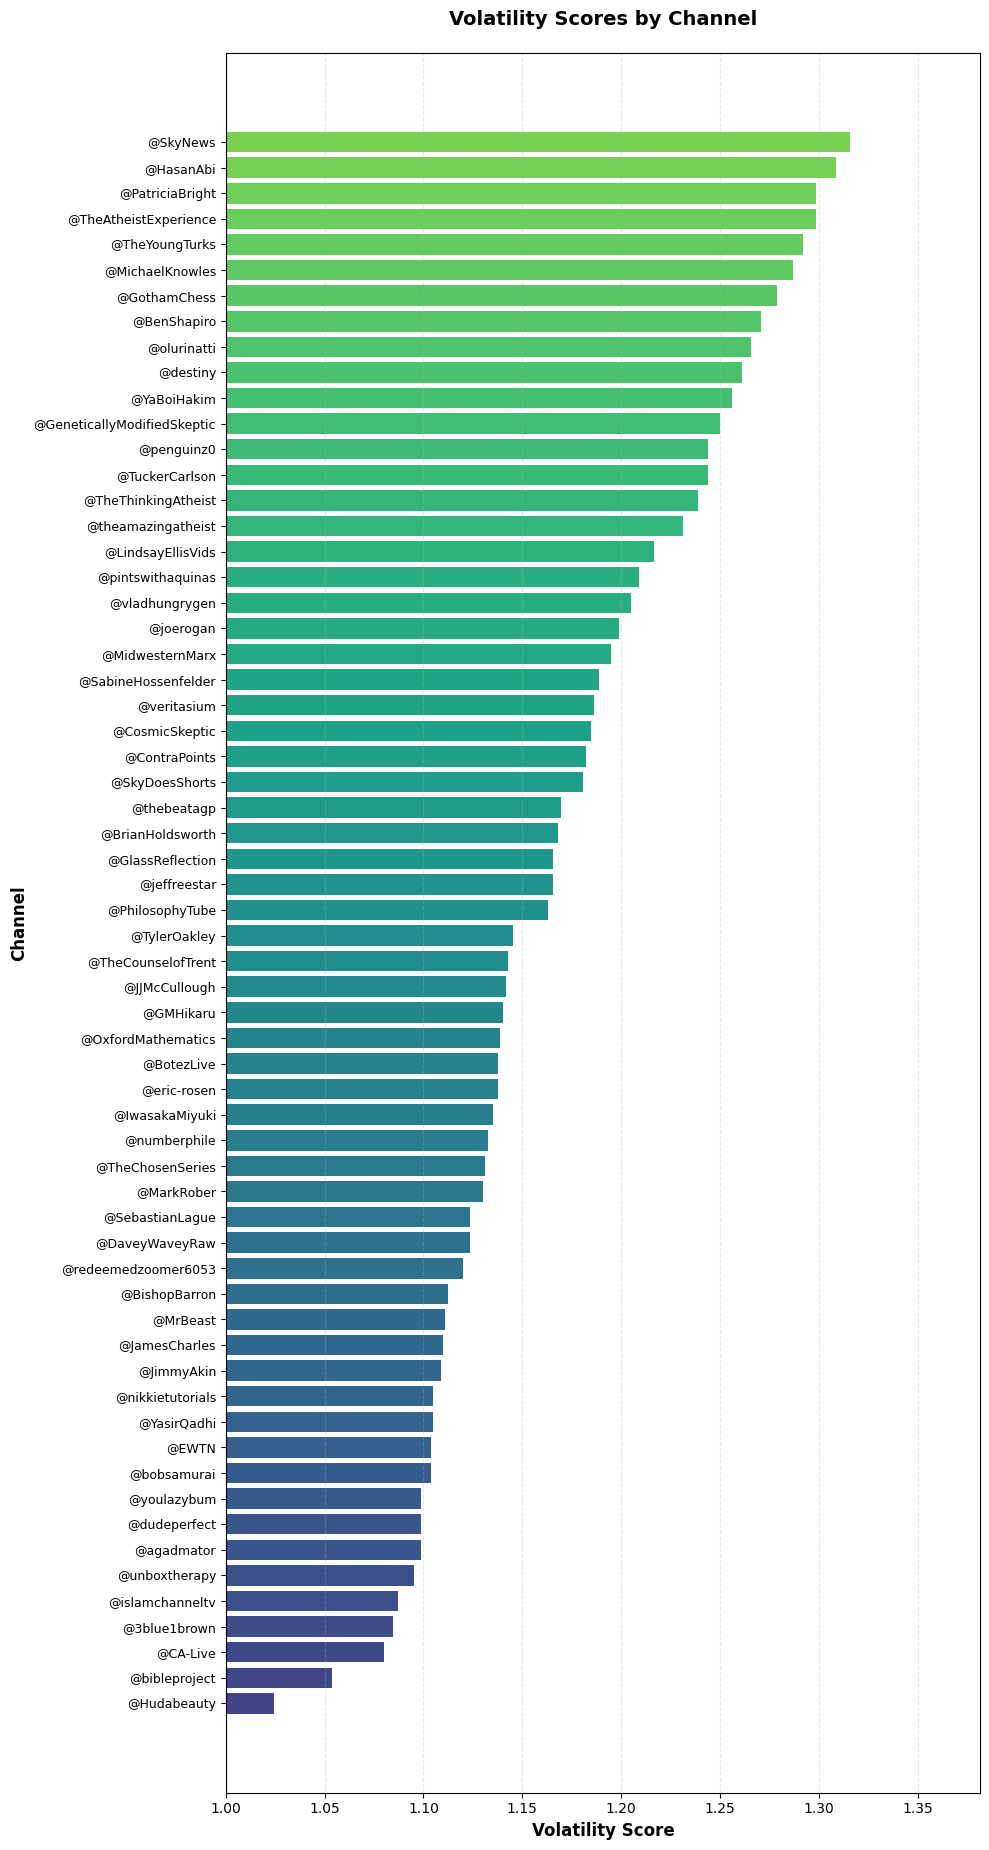

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with good size
plt.figure(figsize=(10, max(8, len(channels_by_volatility) * 0.3)))

# Create horizontal bar chart (better for many labels)
bars = plt.barh(range(len(channels_by_volatility)), sorted_volatility, 
                color=plt.cm.viridis(np.linspace(0.2, 0.8, len(sorted_volatility))))

# Set y-axis labels to channel names
plt.yticks(range(len(channels_by_volatility)), channels_by_volatility, fontsize=9)

# Labels and title
plt.xlabel('Volatility Score', fontsize=12, fontweight='bold')
plt.ylabel('Channel', fontsize=12, fontweight='bold')
plt.title('Volatility Scores by Channel', fontsize=14, fontweight='bold', pad=20)

plt.xlim(left=1)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()
